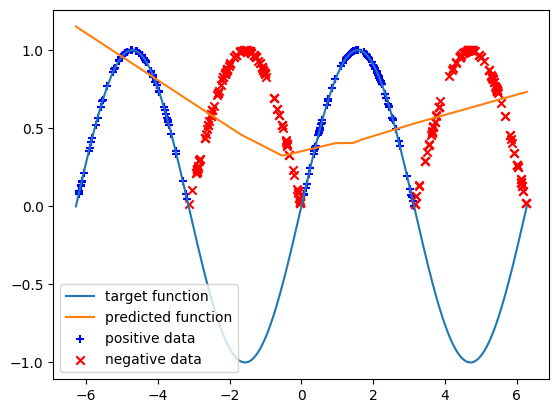

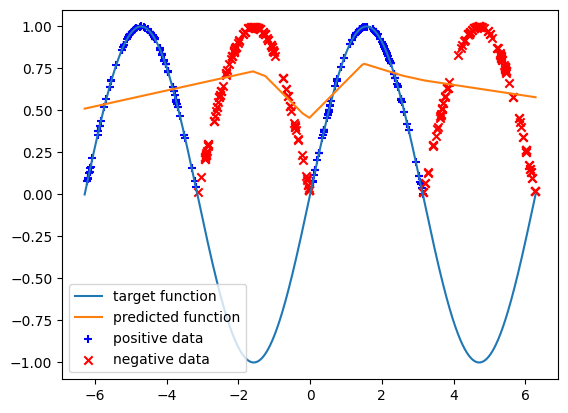

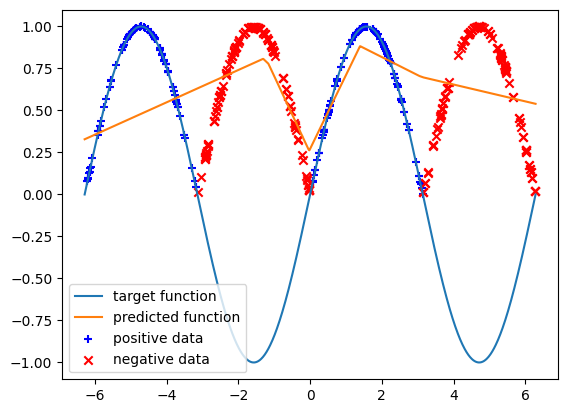

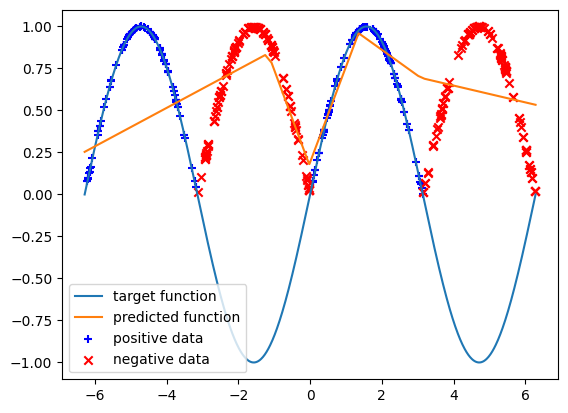

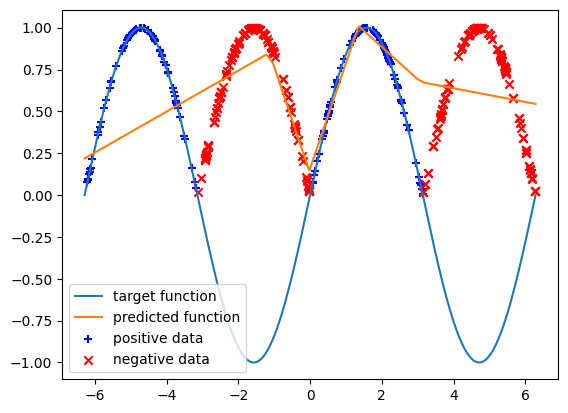

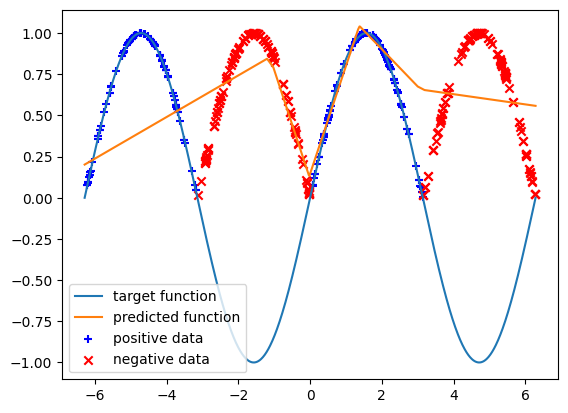

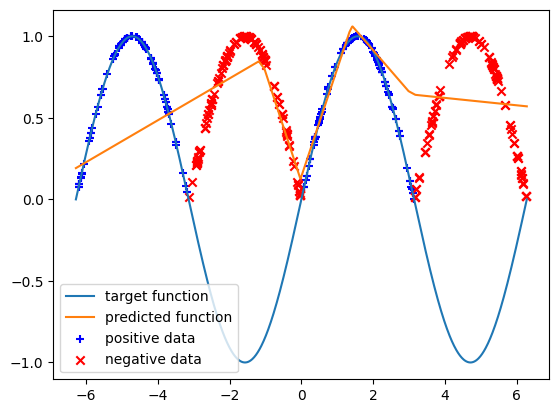

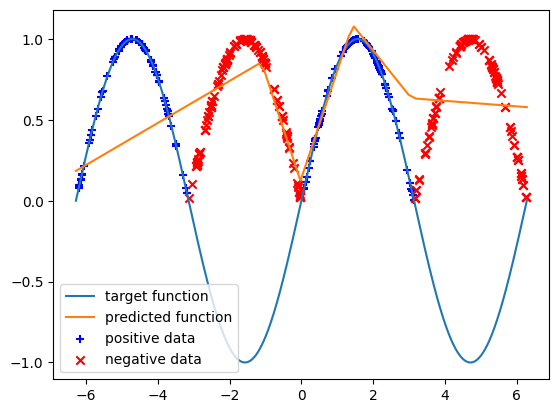

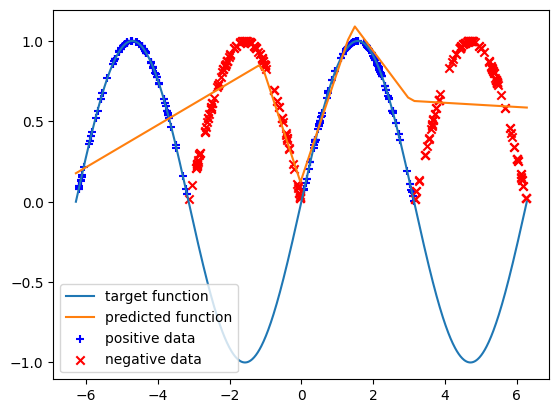

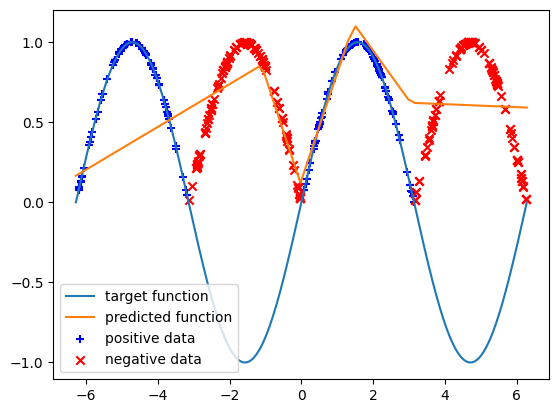

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

In [7]:
import numpy as np
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader

# Plot the results
import matplotlib.pyplot as plt
%matplotlib inline

# Define the target function
def target_func(x):
    return np.sin(x)

# Generate some training data
x_train = np.random.uniform(low=-2*np.pi, high=2*np.pi, size=(500, 1))
y_train = target_func(x_train)

# Create positive and negative training sets
idx_pos = np.random.choice(np.where(y_train >= 0)[0], size=250)
idx_neg = np.random.choice(np.where(y_train < 0)[0], size=250)
x_pos = x_train[idx_pos]
y_pos = y_train[idx_pos]
x_neg = x_train[idx_neg]
y_neg = -y_train[idx_neg]

# Combine the positive and negative training sets
x_train = np.concatenate((x_pos, x_neg), axis=0)
y_train = np.concatenate((y_pos, y_neg), axis=0)

model = nn.Sequential(
          nn.Linear(1, 10),
          nn.ReLU(),
          nn.Linear(10, 1)
        )

# Evaluate the trained model on some test data
x_test = np.linspace(-2*np.pi, 2*np.pi, 1000).reshape(-1, 1)
y_test = target_func(x_test)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

cost_list=[]
accuracy_list=[]
for epoch in range(1000):
    # Training the model
    cost=0
    for x,y in zip(x_train,y_train):
        x = torch.tensor(x).float()
        y = torch.tensor(y).float()
        optimizer.zero_grad()
        yhat = model(x)
        loss = criterion(yhat, y)
        loss.backward()
        optimizer.step()
        cost+=loss.item()
    cost_list.append(cost)
    
    # Evaluating the model
    correct=0
    y_pred = []
    with torch.no_grad():
        for x_test_i, y_test_i in zip(x_test, y_test):
            x_test_i = torch.tensor(x_test_i).float()
            y_test_i = torch.tensor(y_test_i).float()
            yhat = model(x_test_i)
            y_pred.append(yhat.item())
            if (yhat >= 0 and y_test_i >= 0) or (yhat < 0 and y_test_i < 0):
                correct += 1
    accuracy = correct / len(x_test)
    accuracy_list.append(accuracy)
    
    # Plotting the results
    if epoch % 100 == 0:
        plt.plot(x_test, y_test, label='target function')
        plt.plot(x_test, y_pred, label='predicted function')
        plt.scatter(x_pos, y_pos, c='b', marker='+', label='positive data')
        plt.scatter(x_neg, y_neg, c='r', marker='x', label='negative data')
        plt.legend()
        plt.show()

print(accuracy_list)
print(cost_list)


In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the target function
def target_func(x):
    return torch.sin(x)

# Generate some training data
x_train = torch.tensor(np.random.uniform(low=-2*np.pi, high=2*np.pi, size=(500, 1))).float()
y_train = target_func(x_train)

# Create positive and negative training sets
idx_pos = torch.tensor(np.random.choice(np.where(y_train >= 0)[0], size=250))
idx_neg = torch.tensor(np.random.choice(np.where(y_train < 0)[0], size=250))
x_pos = x_train[idx_pos]
y_pos = y_train[idx_pos]
x_neg = x_train[idx_neg]
y_neg = -y_train[idx_neg]

# Combine the positive and negative training sets
x_train = torch.cat((x_pos, x_neg), dim=0)
y_train = torch.cat((y_pos, y_neg), dim=0)

# Define the model
class ForwardForwardModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

model = ForwardForwardModel(input_dim=1)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Train the model
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    y_hat = model(x_train)
    cost = criterion(y_hat, y_train)
    
    # Forward pass on positive and negative data
    y_pos_hat = model(x_pos)
    y_neg_hat = model(x_neg)
    
    # Update weights
    if torch.mean(y_pos_hat) > torch.mean(y_neg_hat):
        loss = torch.mean(y_pos - y_pos_hat)
    else:
        loss = torch.mean(y_neg - y_neg_hat)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    # Print the cost every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Cost = {cost.item():.4f}")


Epoch 0: Cost = 0.8437
Epoch 100: Cost = 2.6429
Epoch 200: Cost = 5.5223
Epoch 300: Cost = 9.4821
Epoch 400: Cost = 14.5221
Epoch 500: Cost = 20.6424
Epoch 600: Cost = 27.8430
Epoch 700: Cost = 36.1239
Epoch 800: Cost = 45.4850
Epoch 900: Cost = 55.9264


In [50]:
import numpy as np

# Define the target function
def target_func(x):
    return np.sin(x)

# Generate some training data
x_train = np.random.uniform(low=-2*np.pi, high=2*np.pi, size=(500, 1))
y_train = target_func(x_train)

# Create positive and negative training sets
idx_pos = np.random.choice(np.where(y_train >= 0)[0], size=250)
idx_neg = np.random.choice(np.where(y_train < 0)[0], size=250)
x_pos = x_train[idx_pos]
y_pos = y_train[idx_pos]
x_neg = x_train[idx_neg]
y_neg = -y_train[idx_neg]

# Combine the positive and negative training sets
x_train = np.concatenate((x_pos, x_neg), axis=0)
y_train = np.concatenate((y_pos, y_neg), axis=0)

# Initialize weights
w = np.random.normal(size=(1,1))

# Train the model
learning_rate = 0.001
num_epochs = 1000


n12 = np.squeeze(np.asarray(w))

x12 = np.squeeze(np.asarray(x_train))
x13 = np.squeeze(np.asarray(x_pos))
x14 = np.squeeze(np.asarray(x_neg))


for epoch in range(num_epochs):
    # Forward pass
    y_hat = np.dot(x12, n12, out=None)
    cost = np.mean((y_train - y_hat) ** 2)
    
    # Forward pass on positive and negative data
    y_pos_hat = np.dot(x13, n12)
    y_neg_hat = np.dot(x14, n12)
    
    # Update weights
    if np.mean(y_pos_hat) > np.mean(y_neg_hat):
        w = w + learning_rate * np.mean(y_pos - y_pos_hat) * x_pos.reshape(-1, 1)
    else:
        w = w - learning_rate * np.mean(y_neg_hat - y_neg) * x_neg.reshape(-1, 1)

        print("bleh")
    # Print the cost every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Cost = {cost:.4f}")


Epoch 0: Cost = 0.5783
Epoch 100: Cost = 0.5783
Epoch 200: Cost = 0.5783
Epoch 300: Cost = 0.5783
Epoch 400: Cost = 0.5783
Epoch 500: Cost = 0.5783
Epoch 600: Cost = 0.5783
Epoch 700: Cost = 0.5783
Epoch 800: Cost = 0.5783
Epoch 900: Cost = 0.5783
